# [Highlight] EDA with Feature Engineering ✨✨✨
---
Goals : 

0. Perform data analysis on current feature that available
1. Performing feature extraction to gain more information
2. Performing data transformation + engineering on data
3. Showcasing before vs after from preprocessing phase

## 📙 Import Library

In [154]:
# Basic 
import sys
import json

# Warning problems in notebook
import warnings
warnings.filterwarnings('ignore')

# Profiling process
from tqdm import tqdm

# Reporting result
from IPython.display import display

# Math
import numpy as np
import scipy as sp
import pandas as pd

# Visualization
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
pd.set_option('display.max_columns', None)

tqdm.pandas()

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'

# Larger scale for plots in notebooks
sns.set_context('notebook')

from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Color constant
color1 = "#F36E8E"
color2 = "#1ABDE9"

## 🎒 Load Data

In [156]:
# === Load data ===

## EDIT THIS CODE
# =====================
filename = "../data/processed/dataset-supervised.pkl"
# =====================

df = pd.read_pickle(filename)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95127 entries, 0 to 95126
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   customer_pickup_point           95127 non-null  int64         
 1   customer_pickup_point_lat       95127 non-null  float64       
 2   customer_pickup_point_long      95127 non-null  float64       
 3   seller_pickup_point             95127 non-null  int64         
 4   seller_pickup_point_lat         95127 non-null  float64       
 5   seller_pickup_point_long        95127 non-null  float64       
 6   order_id                        95127 non-null  object        
 7   user_name                       95127 non-null  object        
 8   seller_id                       95127 non-null  object        
 9   total_item                      95127 non-null  int64         
 10  total_unique_item               95127 non-null  int64         
 11  pa

In [157]:
df.head()

,customer_pickup_point,customer_pickup_point_lat,customer_pickup_point_long,seller_pickup_point,seller_pickup_point_lat,seller_pickup_point_long,order_id,user_name,seller_id,total_item,total_unique_item,package_volume_cm3,package_weight_g,product_volume_cm3_per_item,product_weight_g_per_item,shipping_cost,total_price,aov,seller_city,seller_state,seller_lat,seller_long,customer_city,customer_state,customer_lat,customer_long,order_date,order_day_of_week,order_day_of_month,order_quarter,order_is_weekend,order_hour,order_daytime,order_approved_date,order_approved_day_of_week,order_approved_day_of_month,order_approved_quarter,order_approved_is_weekend,order_approved_hour,order_approved_daytime,pickup_limit_date,pickup_limit_day_of_week,pickup_limit_day_of_month,pickup_limit_quarter,pickup_limit_is_weekend,estimated_date_delivery,actual_date_delivery,wd_approved_interval,wd_actual_delivery_interval,wd_estimated_delivery_interval,wd_pickup_limit_interval,original_distance,pickup_distance,shipping_distance,delivering_distance
0,0,-7.574535,111.780056,0,-6.248292,106.610274,00054e8431b9d7675808bcb819fb4a32,635d9ac1680f03288e72ada3a1035803,7040e82f899a04d1b434b795a43b4617,1,1,2700.0,200.0,2700.0,200.0,11850.0,19900.0,19900.0,TANGERANG,BANTEN,-6.1872,106.4877,SURAKARTA,JAWA TENGAH,-7.5755,110.8243,2017-12-10,7,10,4.0,True,11,Afternoon,2017-12-10,7.0,10.0,4.0,True,12.0,Afternoon,2017-12-14,4,14,4.0,False,2018-01-04,2017-12-18,0,8,25,4,633.769677,20.343350,718.907742,105.455166
1,0,-7.574535,111.780056,0,-6.248292,106.610274,0005a1a1728c9d785b8e2b08b904576c,639d23421f5517f69d0c3d6e6564cf0e,a416b6a846a11724393025641d4edd5e,1,1,5760.0,2000.0,5760.0,2000.0,11650.0,145950.0,145950.0,TANGERANG,BANTEN,-6.1872,106.4877,SEMARANG,JAWA TENGAH,-7.1765,110.4739,2018-03-19,1,19,1.0,False,18,Evening,2018-03-20,2.0,20.0,1.0,False,18.0,Evening,2018-03-26,1,26,1.0,False,2018-03-29,2018-03-29,1,9,9,6,550.667451,20.343350,718.907742,188.229926
2,0,-7.574535,111.780056,0,-6.248292,106.610274,0005f50442cb953dcd1d21e1fb923495,0782c41380992a5a533489063df0eef6,ba143b05f0110f0dc71ad71b4466ce92,1,1,1827.0,850.0,1827.0,850.0,11400.0,53990.0,53990.0,TANGERANG,BANTEN,-6.1872,106.4877,BULELENG,BALI,-8.2239,114.9517,2018-07-02,1,2,3.0,False,13,Afternoon,2018-07-02,1.0,2.0,3.0,False,14.0,Afternoon,2018-07-06,5,6,3.0,False,2018-07-23,2018-07-04,0,2,21,4,1162.132504,20.343350,718.907742,421.798814
3,0,-7.574535,111.780056,0,-6.248292,106.610274,000aed2e25dbad2f9ddb70584c5a2ded,6457be0b331148fb5454efc88d1e03d9,fe2032dab1a61af8794248c8196565c9,1,1,7866.0,468.0,7866.0,468.0,8770.0,144000.0,144000.0,JAKARTA TIMUR,DKI JAKARTA,-6.2250,106.9004,BLORA,JAWA TENGAH,-7.0122,111.3799,2018-05-11,5,11,2.0,False,20,Evening,2018-05-11,5.0,11.0,2.0,False,20.0,Evening,2018-05-16,3,16,2.0,False,2018-05-22,2018-05-18,0,7,11,5,582.691926,34.660284,718.907742,106.635759
4,0,-7.574535,111.780056,0,-6.248292,106.610274,00125cb692d04887809806618a2a145f,7ac26eac431c6848694a2de6f0327524,41b39e28db005d9731d9d485a83b4c38,1,1,40467.0,2500.0,40467.0,2500.0,25510.0,109900.0,109900.0,BOGOR,JAWA BARAT,-6.5518,106.6291,PURBALINGGA,JAWA TENGAH,-7.3059,109.4259,2017-03-23,4,23,1.0,False,12,Afternoon,2017-03-23,4.0,23.0,1.0,False,13.0,Afternoon,2017-03-29,3,29,1.0,False,2017-04-20,2017-04-07,0,15,28,6,392.810623,35.828220,718.907742,289.356488


In [158]:
# Describing numerical data
df.describe()

,customer_pickup_point,customer_pickup_point_lat,customer_pickup_point_long,seller_pickup_point,seller_pickup_point_lat,seller_pickup_point_long,total_item,total_unique_item,package_volume_cm3,package_weight_g,product_volume_cm3_per_item,product_weight_g_per_item,shipping_cost,total_price,aov,seller_lat,seller_long,customer_lat,customer_long,order_day_of_week,order_day_of_month,order_quarter,order_hour,order_approved_day_of_week,order_approved_day_of_month,order_approved_quarter,order_approved_hour,pickup_limit_day_of_week,pickup_limit_day_of_month,pickup_limit_quarter,wd_approved_interval,wd_actual_delivery_interval,wd_estimated_delivery_interval,wd_pickup_limit_interval,original_distance,pickup_distance,shipping_distance,delivering_distance
count,95127.000000,95127.000000,95127.000000,95127.000000,95127.000000,95127.000000,95127.000000,95127.000000,9.512700e+04,95127.000000,95127.000000,95127.000000,9.512700e+04,9.512700e+04,9.512700e+04,95127.000000,95127.000000,95127.000000,95127.000000,95127.000000,95127.000000,95127.000000,95127.000000,95127.000000,95127.000000,95127.000000,95127.000000,95127.000000,95127.000000,95127.000000,95127.000000,95127.000000,95127.000000,95127.000000,95127.000000,95127.000000,95127.000000,95127.000000
mean,3.350079,-5.001181,109.641714,5.378179,-4.499356,109.473406,1.124980,1.023327,1.710334e+04,2359.298306,15162.242101,2101.603915,2.247056e+04,1.360650e+05,1.257098e+05,-4.499356,109.473406,-5.001181,109.641714,3.753330,15.514376,2.353969,14.775353,3.727659,15.514975,2.354526,12.726629,3.140738,16.002996,2.369569,0.509813,12.036026,23.842169,6.152070,1127.450811,62.769231,1101.546081,171.473396
std,2.118565,2.910353,7.061596,6.852517,3.521665,6.433075,0.508212,0.177387,2.991307e+04,4730.534523,23296.011226,3758.213479,2.115058e+04,2.089020e+05,1.906164e+05,3.549529,6.453366,3.103198,7.181768,1.965727,8.664173,1.060523,5.324963,1.867636,8.660055,1.060045,6.603259,1.488936,8.631280,1.053453,0.952340,9.556034,8.773243,4.613229,974.832791,71.009558,966.054374,168.236883
min,0.000000,-7.574535,98.651682,0.000000,-9.840108,95.713021,1.000000,1.000000,1.680000e+02,0.000000,168.000000,0.000000,0.000000e+00,8.500000e+02,8.500000e+02,-10.738600,95.323800,-10.738600,95.323800,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,-6.000000,0.000000,0.850343,22.997525,5.213262
25%,2.000000,-6.282182,106.784239,0.000000,-6.248292,106.610274,1.000000,1.000000,2.912000e+03,300.000000,2816.000000,300.000000,1.377000e+04,4.580000e+04,4.190000e+04,-6.551800,106.487700,-6.858800,106.487700,2.000000,8.000000,1.000000,11.000000,2.000000,8.000000,1.000000,8.000000,2.000000,9.000000,1.000000,0.000000,6.000000,18.000000,4.000000,264.291660,20.343350,269.205868,43.337172
50%,4.000000,-6.282182,106.784239,1.000000,-6.248292,106.610274,1.000000,1.000000,7.128000e+03,745.000000,6384.000000,700.000000,1.706000e+04,8.500000e+04,7.900000e+04,-6.187200,106.810600,-6.187200,106.900400,4.000000,15.000000,2.000000,15.000000,4.000000,15.000000,2.000000,14.000000,3.000000,16.000000,2.000000,0.000000,10.000000,23.000000,6.000000,899.979182,34.166686,958.224443,112.157257
75%,4.000000,-3.304947,111.780056,10.000000,-2.796602,112.438790,1.000000,1.000000,1.980000e+04,2000.000000,18220.500000,1800.000000,2.365000e+04,1.499000e+05,1.399000e+05,-2.582600,112.572200,-3.773900,111.904600,5.000000,23.000000,3.000000,19.000000,5.000000,23.000000,3.000000,18.000000,4.000000,23.000000,3.000000,1.000000,15.000000,29.000000,6.000000,1846.425521,80.911522,1744.861165,266.134890
max,8.000000,2.876428,136.163631,22.000000,4.785526,138.462593,21.000000,7.000000,1.476000e+06,184400.000000,296208.000000,40425.000000,1.794960e+06,1.344000e+07,6.735000e+06,5.892600,140.762400,5.892600,140.762400,7.000000,31.000000,4.000000,23.000000,7.000000,31.000000,4.000000,23.000000,7.000000,31.000000,4.000000,31.000000,208.000000,154.000000,1051.000000,6354.912703,709.916923,5381.160685,1003.188

In [159]:
# Describing categorical data
df.describe(include='O')

,order_id,user_name,seller_id,seller_city,seller_state,customer_city,customer_state,order_daytime,order_approved_daytime
count,95127,95127,95127,95127,95127,95127,95127,95127,95127
unique,95127,92150,2948,363,34,488,34,4,4
top,4ea1a4c03356983fb0ac9ab44a7b03cf,8d50f5eadf50201ccdcedfb9e2ac8455,6560211a19b47992c3666cc44a7e94c0,TANGERANG,BANTEN,TANGERANG,BANTEN,Afternoon,Afternoon
freq,1,15,1786,25791,28726,17554,20209,42931,35922


In [160]:
target = "wd_actual_delivery_interval"

## 🔍 Exploratory Data Analysis

### Target Attribute

Text(0.5, 1.0, 'Target Distribution')

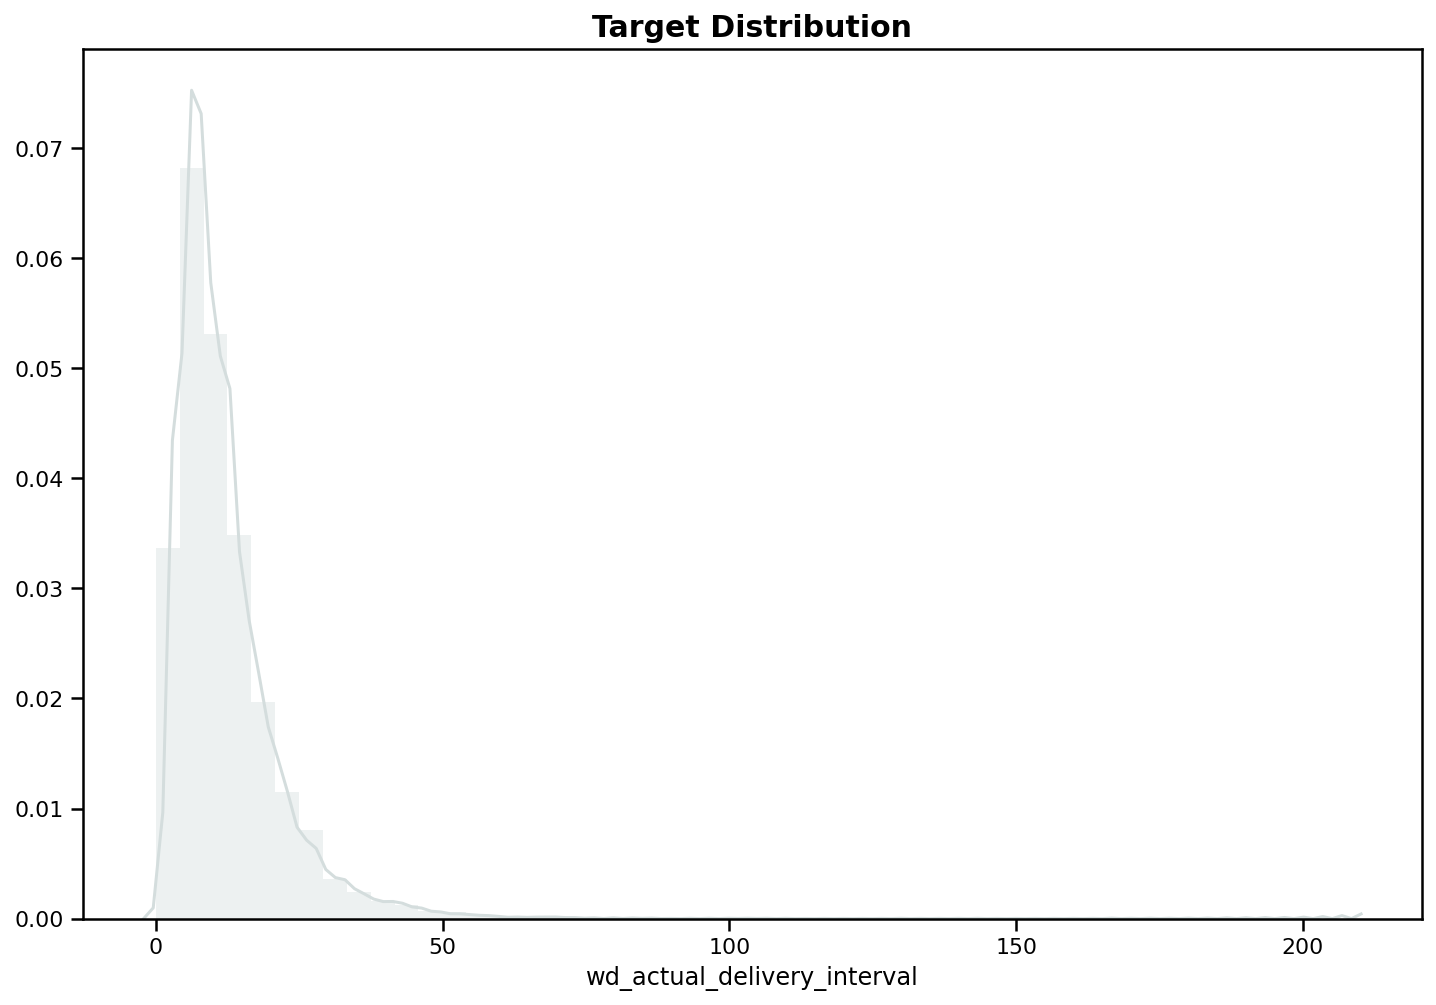

In [161]:
fig = plt.figure(figsize=(12, 8))
sns.distplot(df[target], color='#d4dddd')
plt.title('Target Distribution', weight='bold', fontsize=15)

Need to remove the outlier, in this case we can use IQR to remove the outlier of the data

In [162]:
# Outlier -> IN this case, it happens because of natural outliers...
data = df.wd_actual_delivery_interval.values

# First quartile (Q1)
Q1 = np.percentile(data, 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(data, 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1
min_bound = Q1 - 1.5 * IQR
max_bound = Q3 + 1.5 * IQR
print(f"IQR : {IQR}")
print(f"Lower bound : {min_bound}")
print(f"Upper bound : {max_bound}")

# Tbh, we should use IQR * 1.5 to find upper bound and lower bound, but in here case, we should use 1 month as the outlier base
non_outlier = df.loc[df[target] <= max_bound] # since that lower bound < 0, we can ignore the lower bound 
outlier = df.loc[df[target] >= max_bound]

df = non_outlier.copy()

IQR : 9.0
Lower bound : -7.5
Upper bound : 28.5


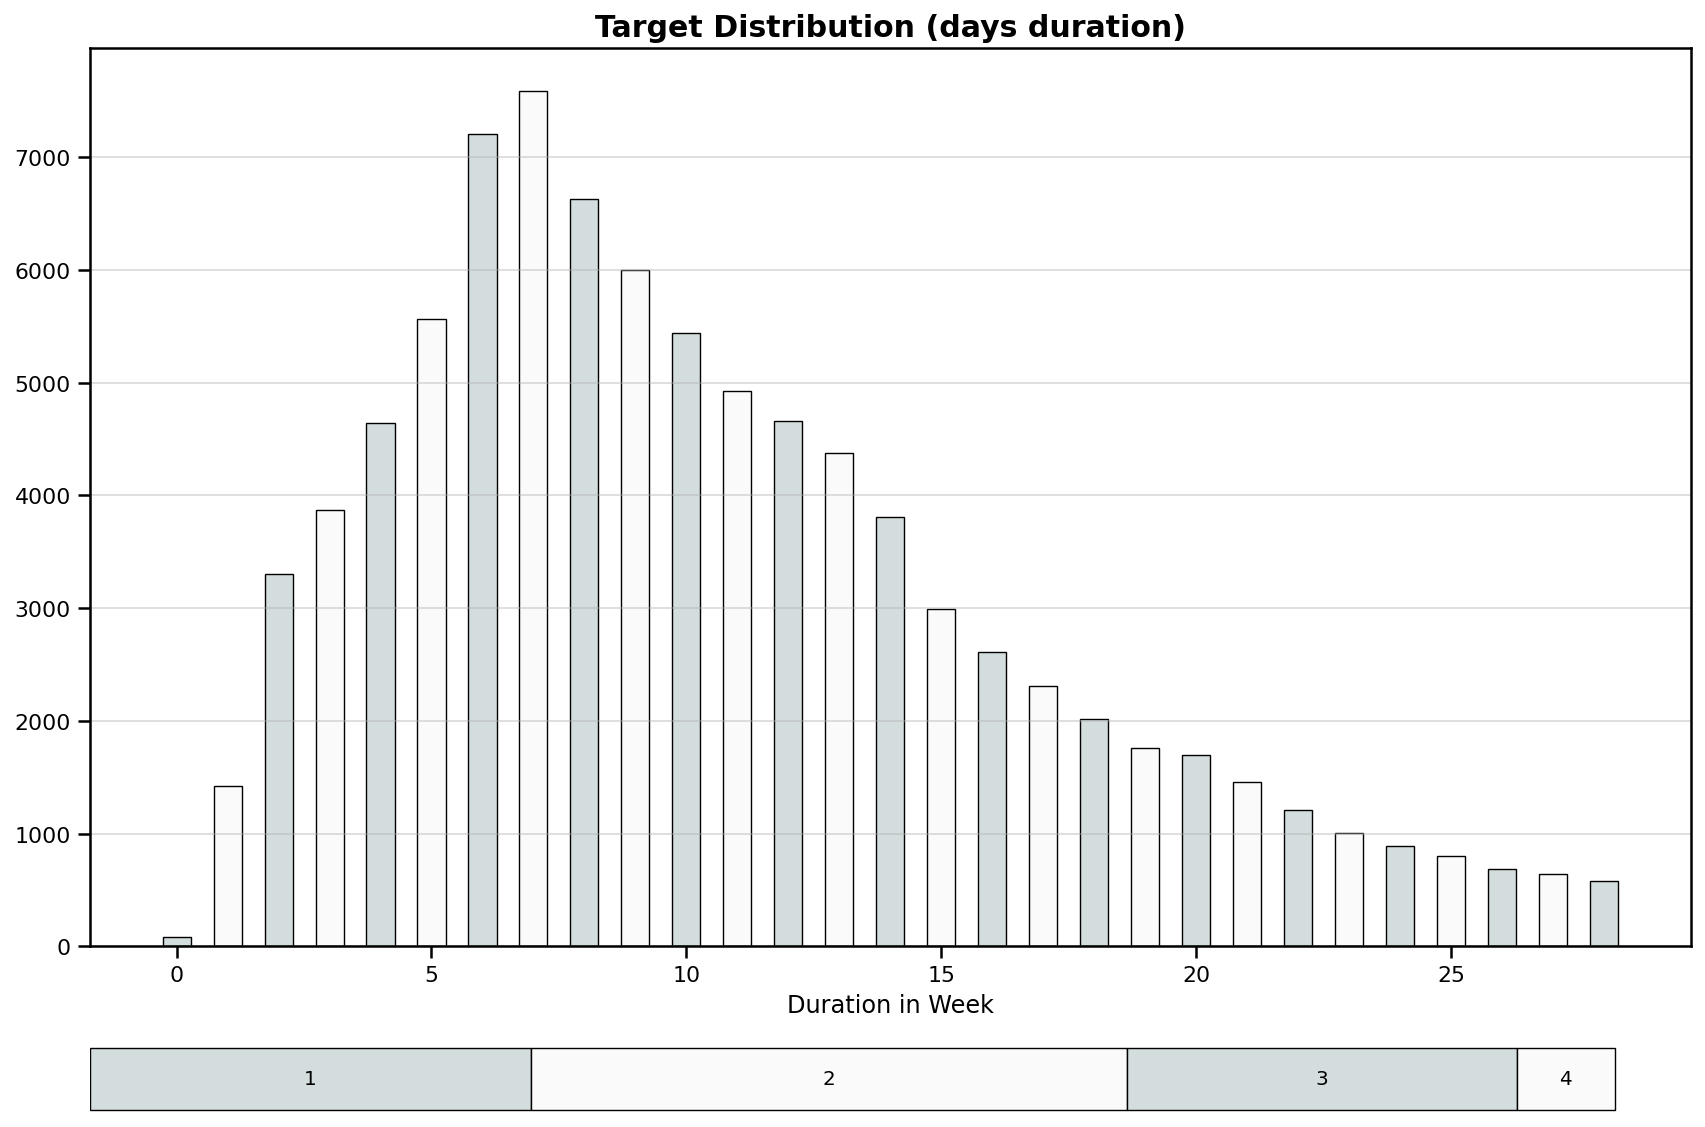

In [163]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(7, 4)
ax = fig.add_subplot(gs[:-1,:])
ax2 = fig.add_subplot(gs[-1,:])
ax2.axis('off')

target_cnt = df[target].value_counts().sort_index()
target_cum = target_cnt.cumsum()
ax.bar(target_cnt.index, target_cnt, color=['#d4dddd' if i%2==0 else '#fafafa' for i in range(29)],
       width=0.55, 
       edgecolor='black', 
       linewidth=0.7)

weekly_cnt = pd.Series([len(df[target].loc[df[target] < 7].values), 
           len(df[target].loc[(df[target] >= 7) & (df[target] < 13)].values),
           len(df[target].loc[(df[target] >= 13) & (df[target] < 22)].values),
           len(df[target].loc[df[target] >= 22].values)
          ])

weekly_cum = weekly_cnt.cumsum()

for i in range(4):
    ax2.barh([0], [weekly_cnt[i]], left=[weekly_cum[i] - weekly_cnt[i]], height=0.2, 
            edgecolor='black', linewidth=0.7, color='#d4dddd' if i%2==0 else '#fafafa'
            )
    ax2.annotate(i+1, xy=(weekly_cum[i]-weekly_cnt[i]/2, 0), 
                 va='center', ha='center', fontsize=10)

ax.set_title('Target Distribution (days duration)', weight='bold', fontsize=15)
ax.grid(axis='y', linestyle='-', alpha=0.4)

ax.set_xlabel("Duration in Week")

fig.tight_layout()
plt.show()

## 🔢 Numerical Feature

In [164]:
numerical_feature = [
    
    # Order details
    "aov",
    "total_price",
    "shipping_cost",
    "total_item",
    
    # Distance cols
    "original_distance",
    "pickup_distance",
    "shipping_distance",
    "delivering_distance",
    
    # Duration cols 
    "wd_approved_interval",
    "wd_pickup_limit_interval",
    
    # Product details
    "package_volume_cm3",
    "package_weight_g",
    
    "product_volume_cm3_per_item",
    "product_weight_g_per_item",
    
    # For evaluation
    "wd_actual_delivery_interval"
]

### Univariative Variable

In [165]:
# === Numerical Feature Basic Statistics === 
df[numerical_feature].describe().T.style \
                            .bar(subset=['mean'], color=color2)\
                            .bar(subset=['min', 'max'], color=color1)\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
aov,90183.000000,124068.404149,188500.699371,850.000000,40000.000000,78900.000000,139000.000000,6735000.000000
total_price,90183.000000,134448.451371,207441.524059,850.000000,45000.000000,84900.000000,149000.000000,13440000.000000
shipping_cost,90183.000000,22046.653139,20511.097921,0.000000,13590.000000,16850.000000,23340.000000,1794960.000000
total_item,90183.000000,1.126088,0.510966,1.000000,1.000000,1.000000,1.000000,21.000000
original_distance,90183.000000,1120.459044,974.691005,0.000000,251.363188,882.015318,1840.218843,6354.912703
pickup_distance,90183.000000,62.705506,70.829043,0.850343,20.343350,34.166686,80.911522,709.916923
shipping_distance,90183.000000,1094.666090,965.586076,22.997525,177.114160,822.072042,1696.583824,5381.160685
delivering_distance,90183.000000,170.397663,167.660048,5.213262,43.337172,110.810984,265.942999,1003.188587
wd_approved_interval,90183.000000,0.510063,0.954538,0.000000,0.000000,0.000000,1.000000,31.000000
wd_pickup_limit_interval,90183.000000,6.089208,4.579152,-6.000000,4.000000,6.000000,6.000000,1051.000000


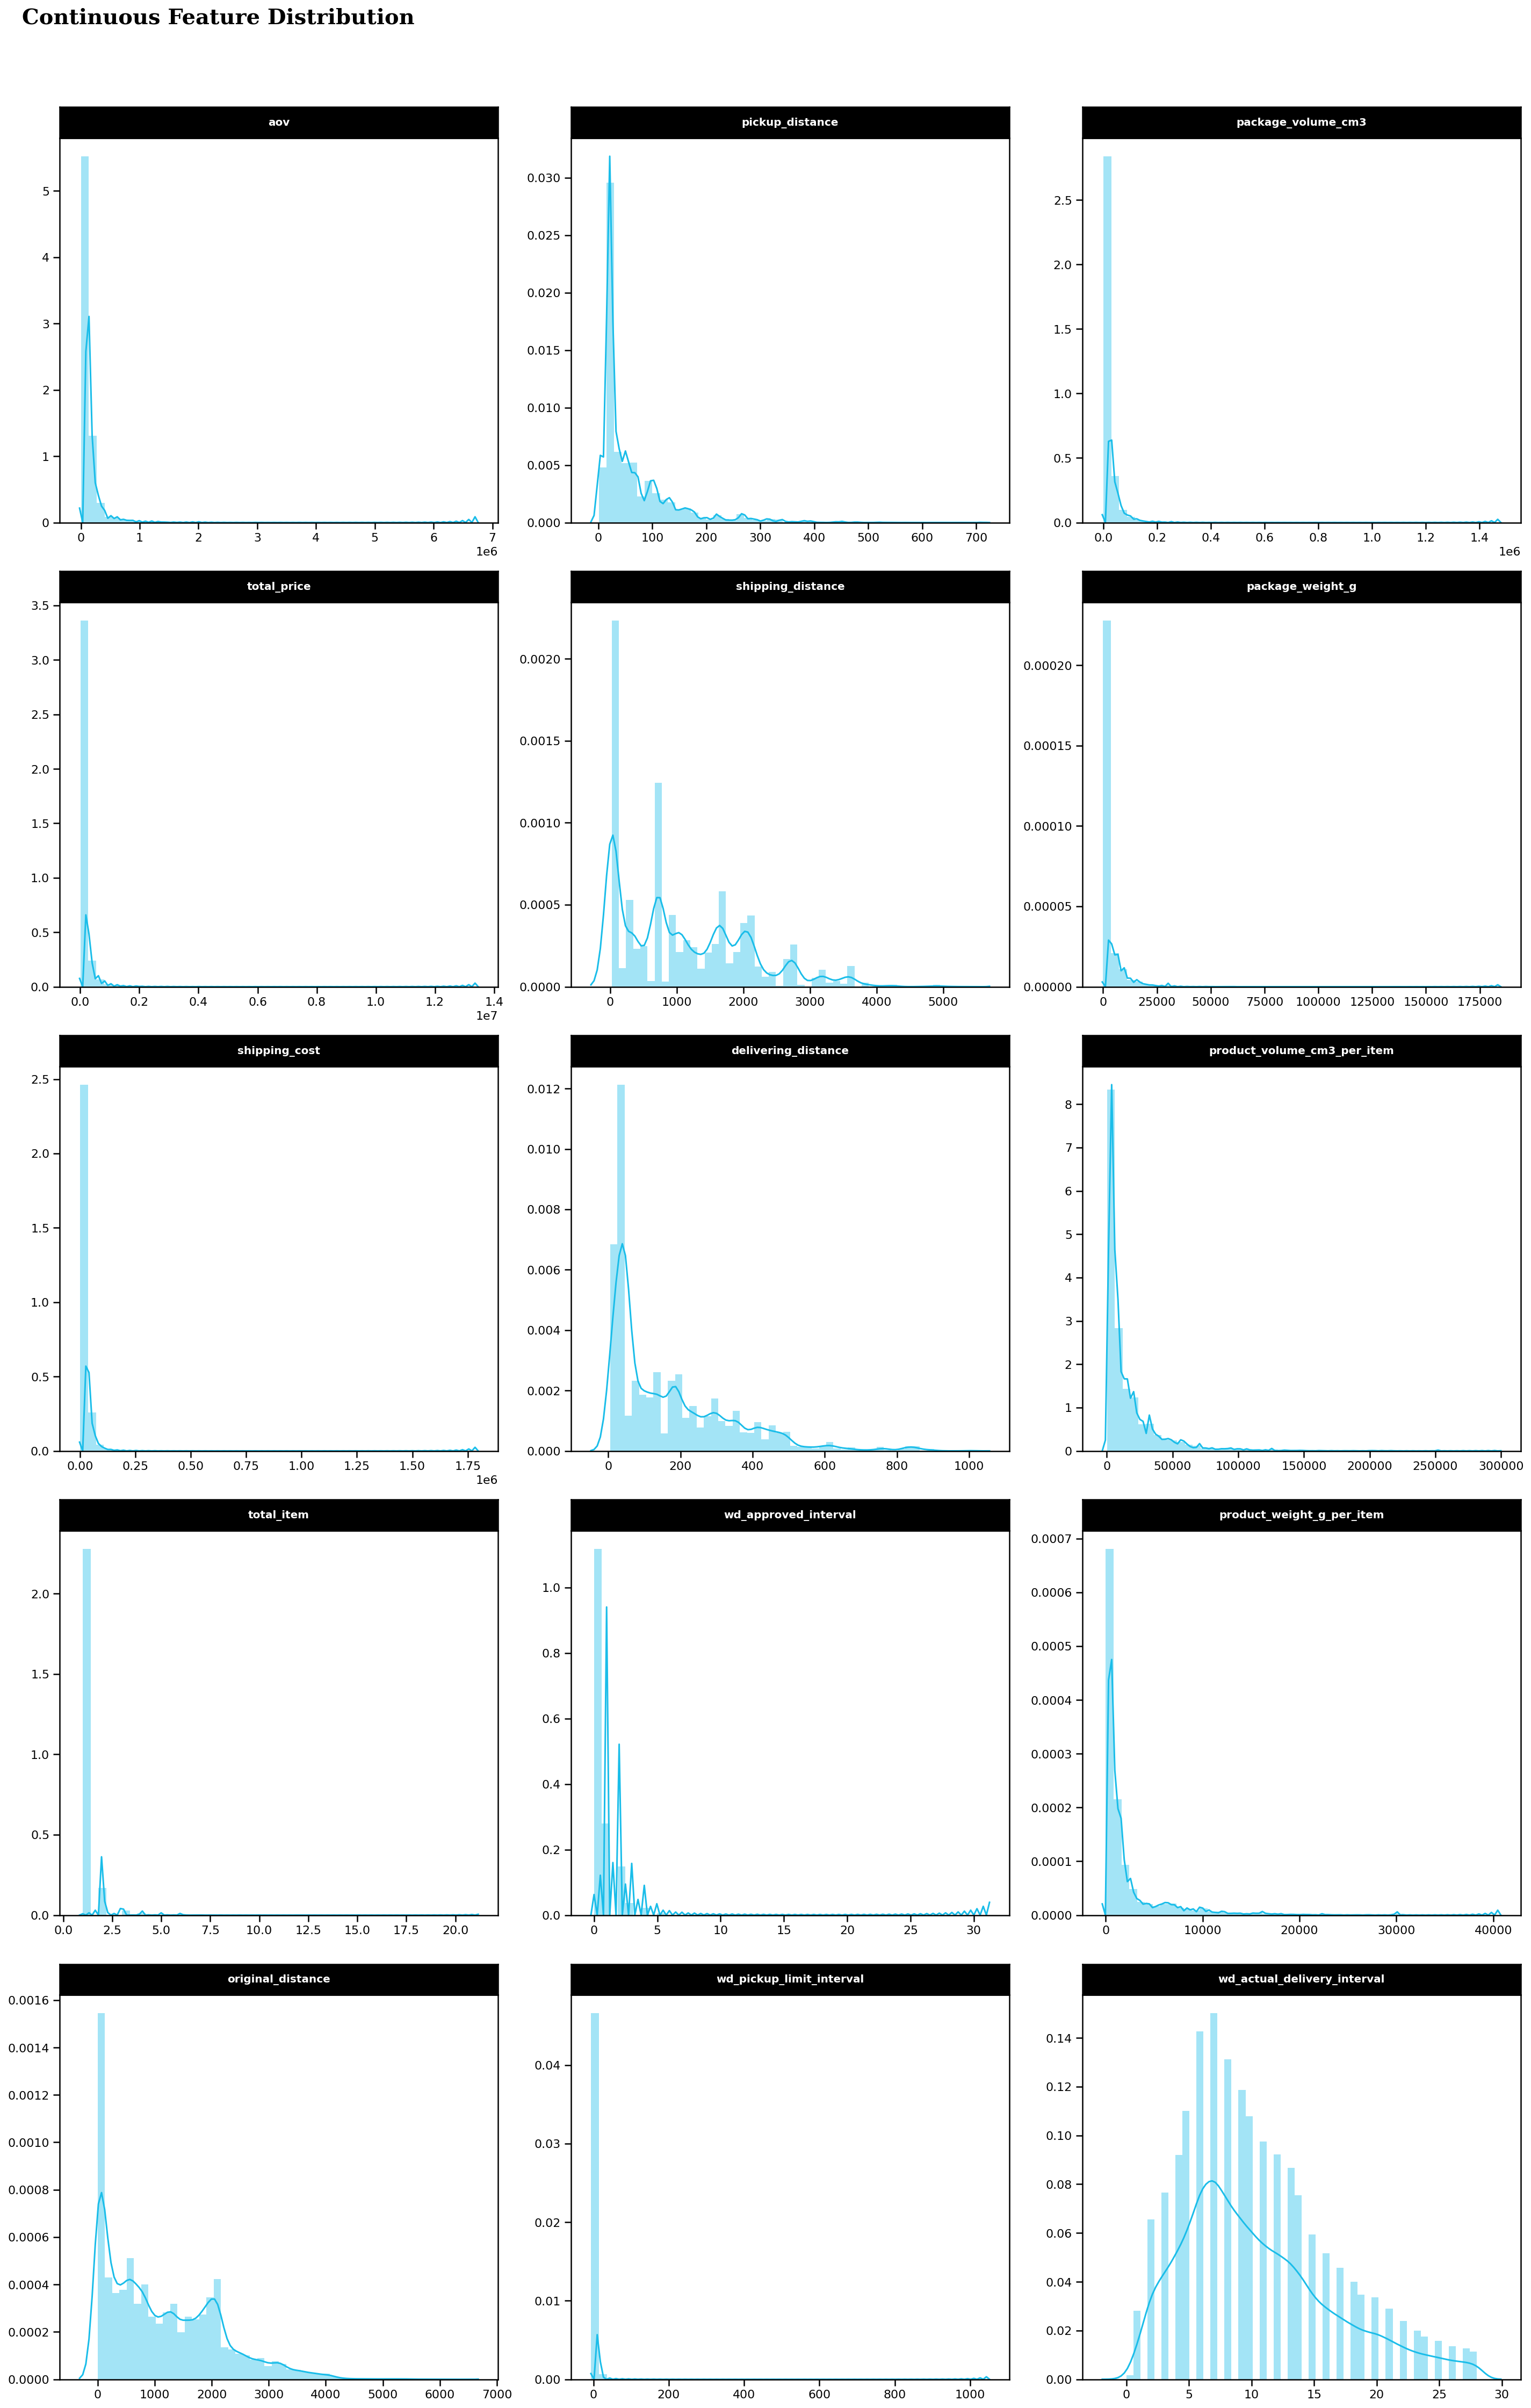

In [166]:
# === Numerical Feature Distribution ===
fig, ax = plt.subplots(5, 3, figsize=(20, 30))

for i in range(len(numerical_feature)): 
    sns.distplot(df[numerical_feature[i]], 
                color=color2,
                ax=ax[i%5][i//5])
    
#     ax[i%5][i//5].set_yticks([])
    ax[i%5][i//5].set_xlabel('',visible=False)
#     ax[i%5][i//5].margins(0.05, 0.2)
    
    divider = make_axes_locatable(ax[i%5][i//5])
    cax = divider.append_axes("top", size="8%", pad=0)
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_facecolor('black')

    at = AnchoredText(f'{numerical_feature[i]}', loc=10, 
                      prop=dict(backgroundcolor='black',
                                size=10, color='white', weight='bold'))
    cax.add_artist(at)
    
fig.text(0.018, 1.03, 'Continuous Feature Distribution', fontsize=20, fontweight='bold', fontfamily='serif')

plt.tight_layout()
plt.show()

,wd_actual_delivery_interval
wd_actual_delivery_interval,1.000000
shipping_cost,0.194189
original_distance,0.160557
shipping_distance,0.156915
delivering_distance,0.137576
wd_pickup_limit_interval,0.126716
product_weight_g_per_item,0.078520
package_weight_g,0.072455
product_volume_cm3_per_item,0.069488
package_volume_cm3,0.064266


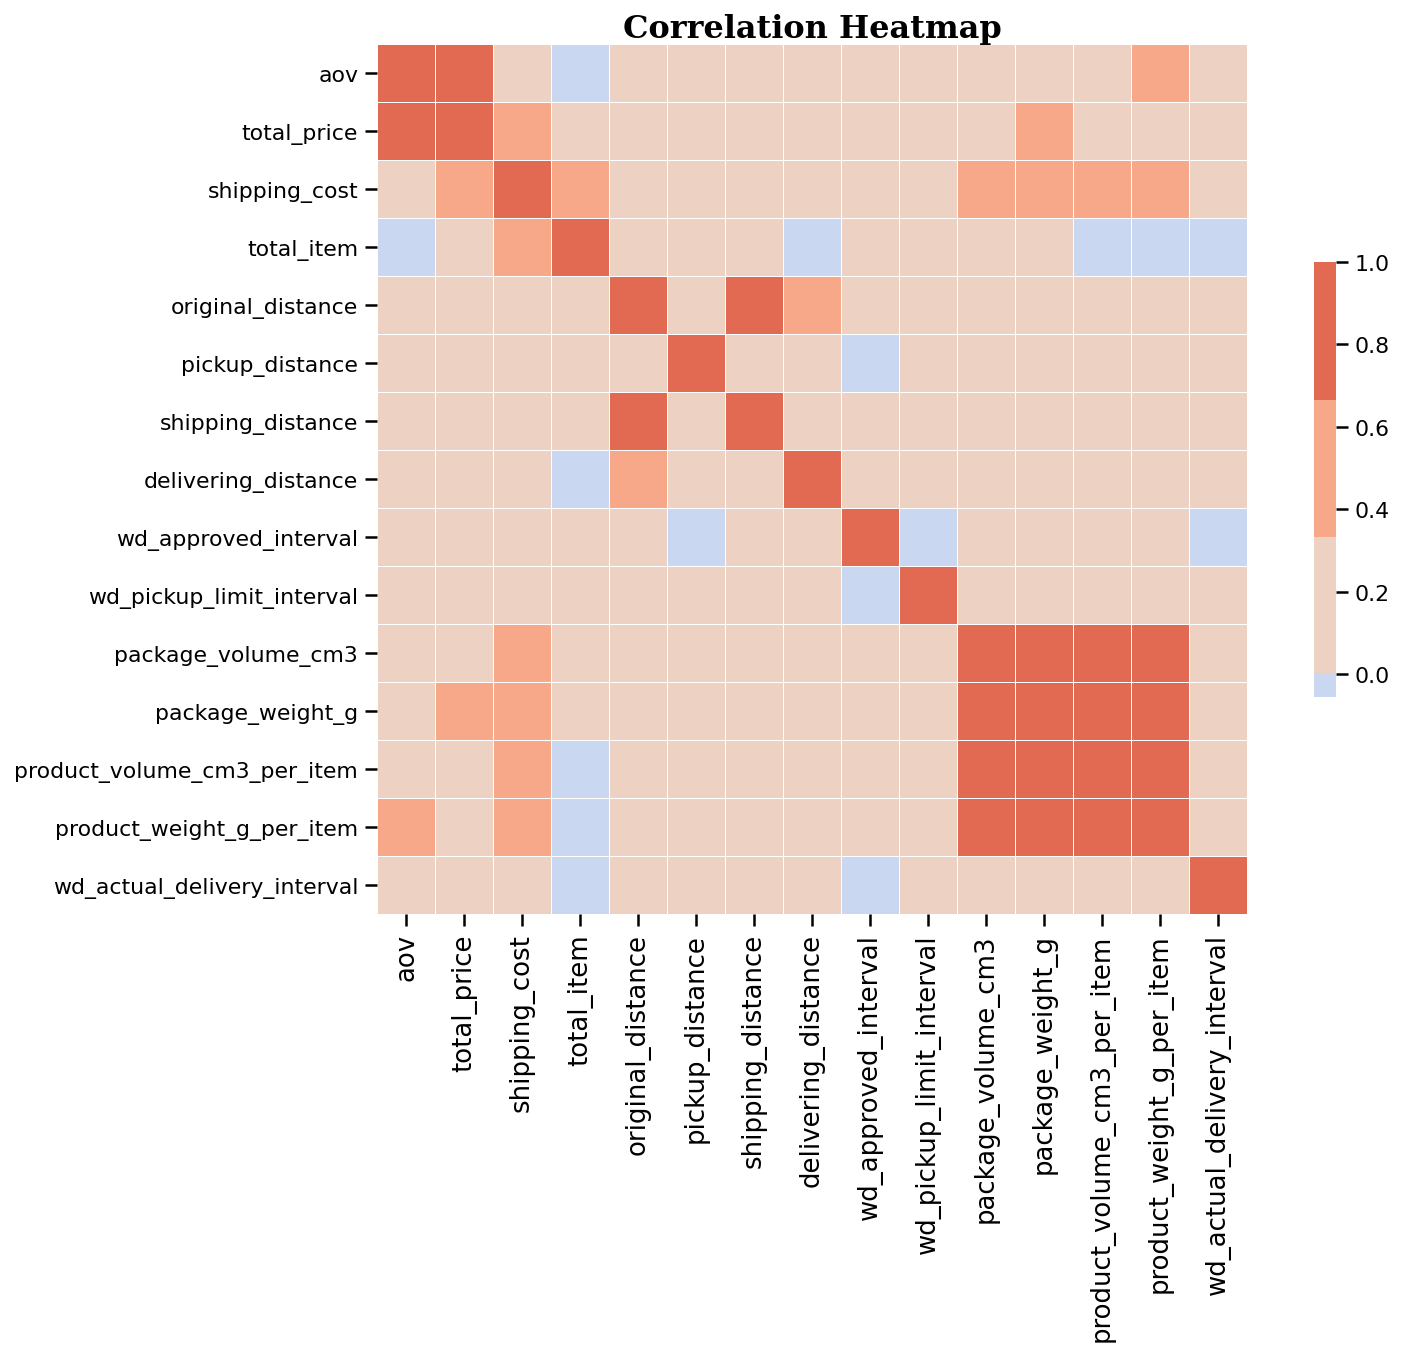

In [167]:
## Bivariative - Correlation Heatmap
corr = df[numerical_feature].corr()
lowerlimit = 0 # limit the correlation
upperlimit = 1
m = ~(corr.mask(np.eye(len(corr), dtype=bool)).abs()[target] < lowerlimit) & ~(corr.mask(np.eye(len(corr), dtype=bool)).abs()[target] > upperlimit) &  ~(corr.mask(np.eye(len(corr), dtype=bool)).abs()[target].isna())
m[target] = True
limited = corr.loc[m]
corr_cols = [col for col in m.index if m[col]]
display(limited[target].to_frame().sort_values(by=target, ascending=False).style.background_gradient(cmap='coolwarm'))
mask = np.triu(np.ones_like(corr[corr_cols], dtype=bool))

plt.figure(figsize=(12,8))
sns.heatmap(df[corr_cols].corr(), linewidth=.5,cmap=sns.color_palette("coolwarm"), center=0,square=True, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap",fontsize=16, va= 'center', fontfamily='serif',fontweight='semibold')
plt.tick_params(axis='x', which='major', labelsize=13)
plt.show()

## 📈 Categorical Feature

In [168]:
categorical_features = [
    "order_is_weekend",
    "order_approved_is_weekend",
    "pickup_limit_is_weekend",
    "order_daytime",
    "order_approved_daytime"
]

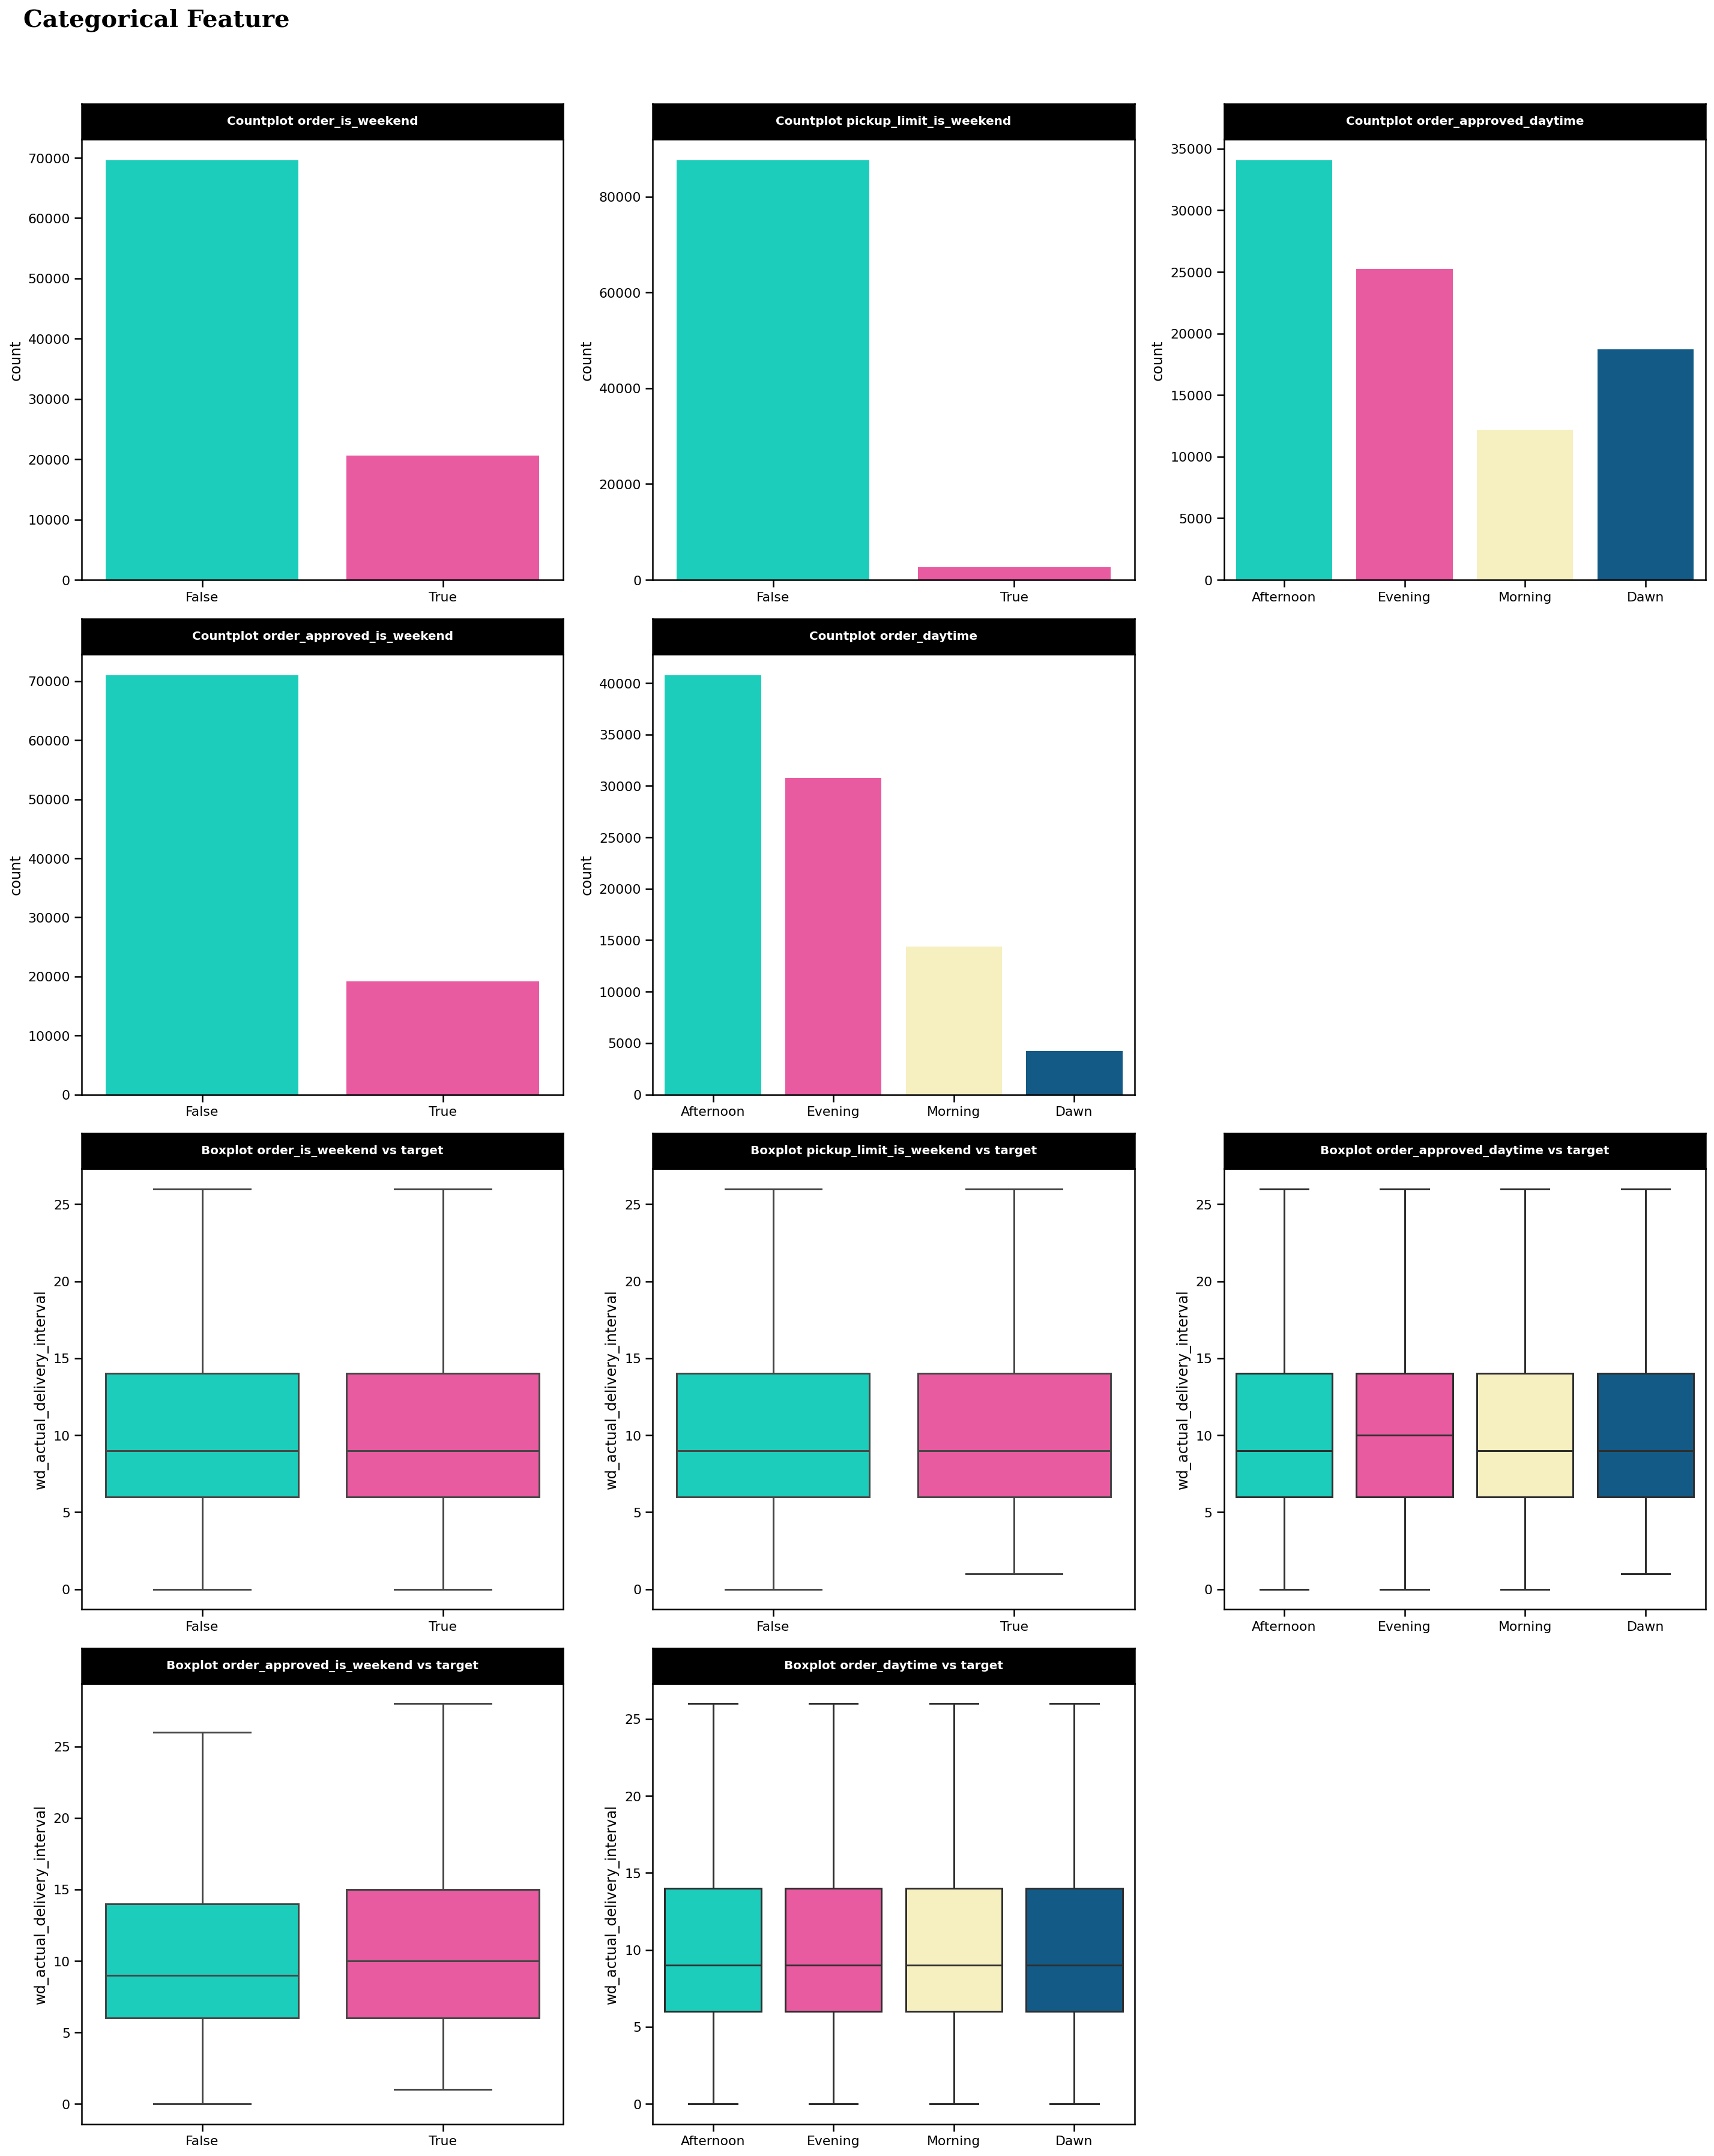

In [169]:
# === Categorical Feature Distribution ===
fig, ax = plt.subplots(4, 3, figsize=(20, 24))

color_scheme=['#00EAD3','#FF449F','#FFF5B7','#005F99']

for i in range(len(categorical_features)): 
    sns.countplot(df[categorical_features[i]], ax=ax[i%2][i//2], palette=color_scheme)
    sns.boxplot(data=df, x=categorical_features[i], y=target, ax=ax[(i%2) + 2][i//2], palette=color_scheme,showfliers=False)

    ax[i%2][i//2].set_xlabel('',visible=False)
    ax[i%2 + 2][i//2].set_xlabel('',visible=False)
    
    divider = make_axes_locatable(ax[i%2][i//2])
    cax = divider.append_axes("top", size="8%", pad=0)
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_facecolor('black')
    
    divider2 = make_axes_locatable(ax[i%2 + 2][i//2])
    cax2 = divider2.append_axes("top", size="8%", pad=0)
    cax2.get_xaxis().set_visible(False)
    cax2.get_yaxis().set_visible(False)
    cax2.set_facecolor('black')

    at = AnchoredText(f'Countplot {categorical_features[i]}', loc=10, 
                      prop=dict(backgroundcolor='black',
                                size=10, color='white', weight='bold'))
    cax.add_artist(at)
    
    at2 = AnchoredText(f'Boxplot {categorical_features[i]} vs target', loc=10, 
                      prop=dict(backgroundcolor='black',
                                size=10, color='white', weight='bold'))
    cax2.add_artist(at2)
    
# Last item missing
ax[1][-1].set_visible(False)
ax[3][-1].set_visible(False)
fig.text(0.018, 1.03, 'Categorical Feature', fontsize=20, fontweight='bold', fontfamily='serif')

plt.tight_layout()
plt.show()

## 📍 Location Pickup Point (From Clustering Result)

In [170]:
# === Get each seller pickup points ===
seller_pickup_points = df \
    .groupby(['seller_pickup_point']).agg(
        seller_pickup_point_lat = ('seller_pickup_point_lat', 'first'),
        seller_pickup_point_long = ('seller_pickup_point_long', 'first'),
        pop = ('seller_pickup_point', 'size')
    ).reset_index()

# === Get each customer pickup points ===
customer_pickup_points = df \
    .groupby(['customer_pickup_point']).agg(
        customer_pickup_point_lat = ('customer_pickup_point_lat', 'first'),
        customer_pickup_point_long = ('customer_pickup_point_long', 'first'),
        pop = ('customer_pickup_point', 'size')
    ).reset_index()

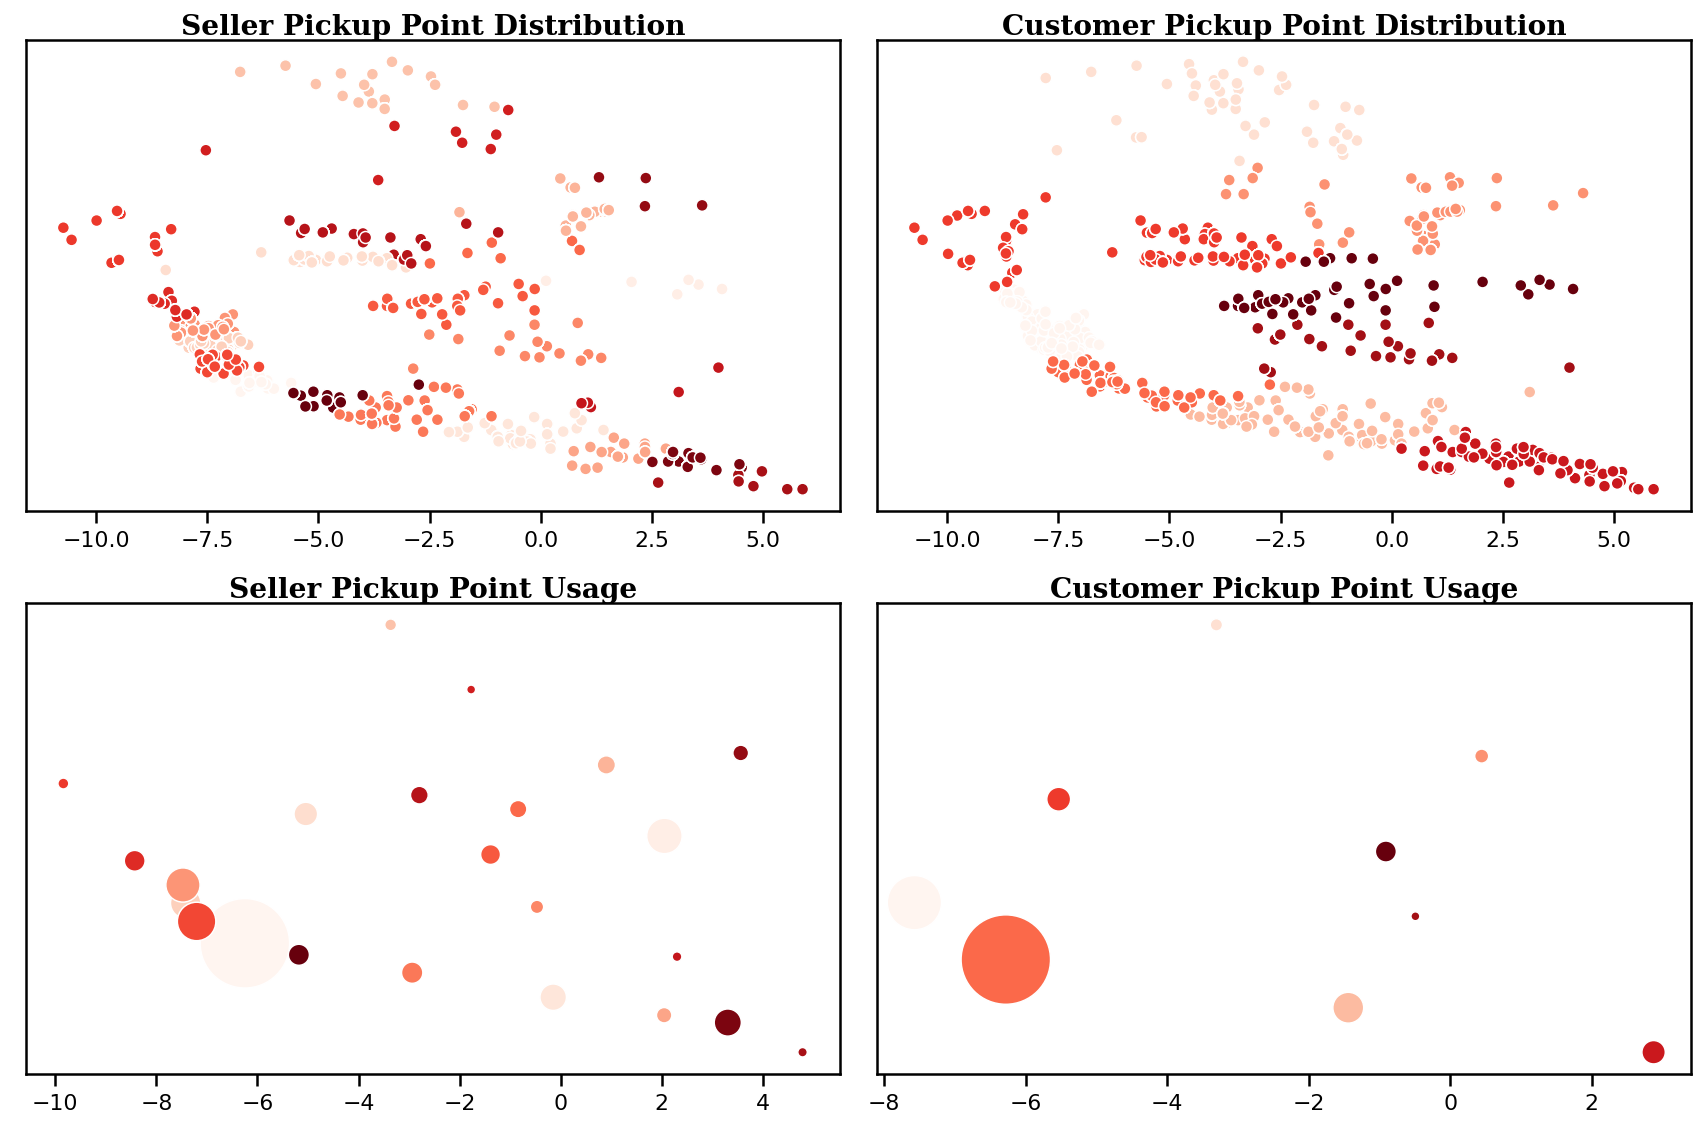

In [171]:
# === Geolocation Feature Distribution ===
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

color_scheme = 'Reds'

sns.scatterplot(x="seller_lat", y="seller_long", data=df, hue="seller_pickup_point", ax=ax[0][0], palette=color_scheme, legend=False)
sns.scatterplot(x="customer_lat", y="customer_long", data=df, hue="customer_pickup_point", ax=ax[0][1], palette=color_scheme, legend=False)

sns.scatterplot(data=seller_pickup_points, x="seller_pickup_point_lat", y="seller_pickup_point_long", ax=ax[1][0], palette=color_scheme, size="pop", hue="seller_pickup_point", legend=False, sizes=(20, 2000))
sns.scatterplot(data=customer_pickup_points, x="customer_pickup_point_lat", y="customer_pickup_point_long", ax=ax[1][1], palette=color_scheme, size="pop", hue="customer_pickup_point", legend=False, sizes=(20, 2000))

for i in range(2):
    for j in range(2):
        ax[i][j].set_yticks([])
#         ax[i][j].set_xticks([])
        ax[i][j].set_ylabel("")
        ax[i][j].set_xlabel("")
        
ax[0][0].set_title("Seller Pickup Point Distribution", fontsize=14, va= 'center', fontfamily='serif',fontweight='semibold')
ax[0][1].set_title("Customer Pickup Point Distribution", fontsize=14, va= 'center', fontfamily='serif',fontweight='semibold')
ax[1][0].set_title("Seller Pickup Point Usage", fontsize=14, va= 'center', fontfamily='serif',fontweight='semibold')
ax[1][1].set_title("Customer Pickup Point Usage", fontsize=14, va= 'center', fontfamily='serif',fontweight='semibold')

plt.tight_layout()
plt.show()

## ⚙️ Feature Engineering

### Categorical

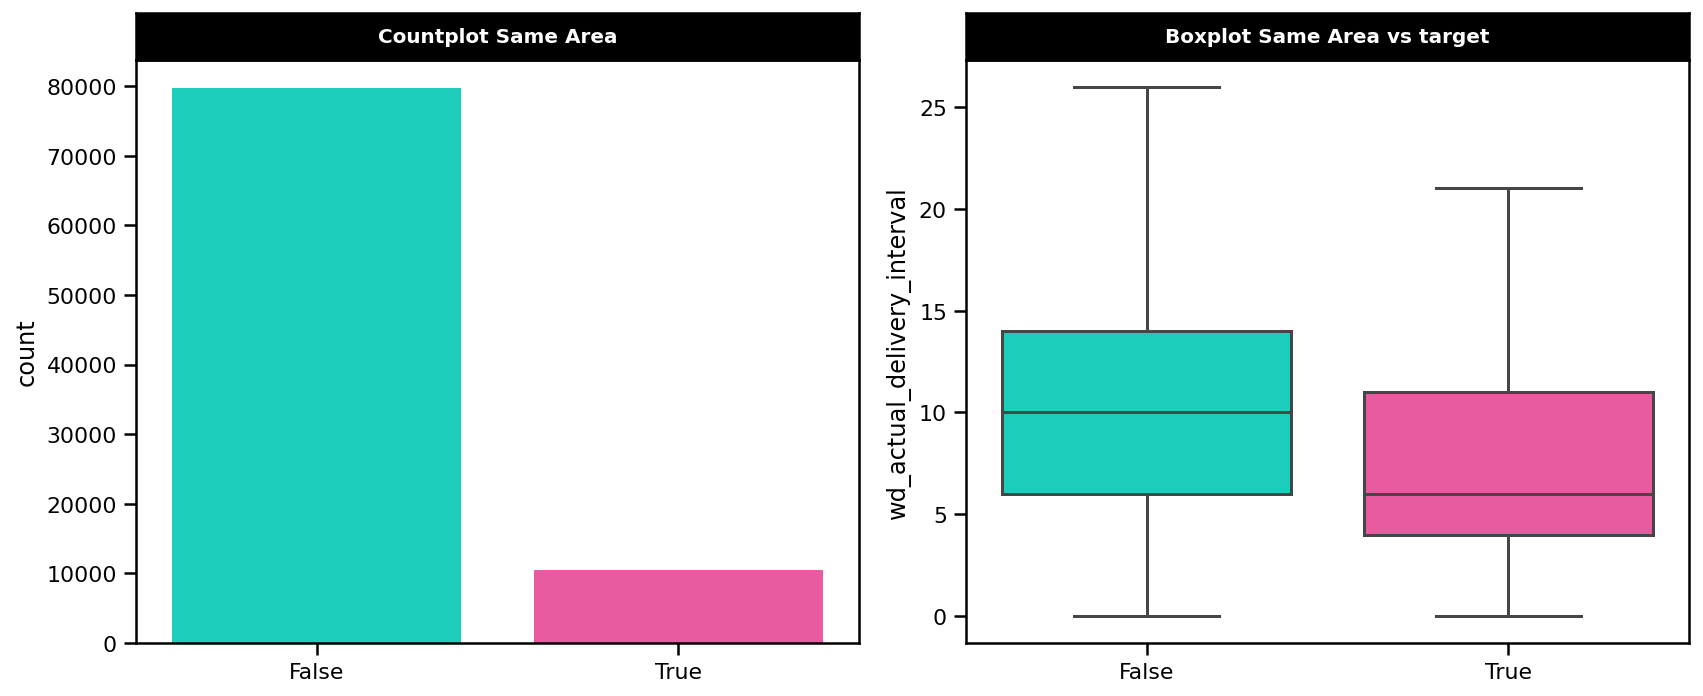

In [172]:
df['is_same_area'] = df['seller_state'] == df['customer_state']

# === New Categorical Feature  ===
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

color_scheme=['#00EAD3','#FF449F','#FFF5B7','#005F99']
sns.countplot(df['is_same_area'], ax=ax[0], palette=color_scheme)
sns.boxplot(data=df, x='is_same_area', y=target, ax=ax[1], palette=color_scheme,showfliers=False)

ax[0].set_xlabel('',visible=False)
ax[1].set_xlabel('',visible=False)

divider = make_axes_locatable(ax[0])
cax = divider.append_axes("top", size="8%", pad=0)
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.set_facecolor('black')

divider2 = make_axes_locatable(ax[1])
cax2 = divider2.append_axes("top", size="8%", pad=0)
cax2.get_xaxis().set_visible(False)
cax2.get_yaxis().set_visible(False)
cax2.set_facecolor('black')

at = AnchoredText(f'Countplot Same Area', loc=10, 
                  prop=dict(backgroundcolor='black',
                            size=10, color='white', weight='bold'))
cax.add_artist(at)

at2 = AnchoredText(f'Boxplot Same Area vs target', loc=10, 
                  prop=dict(backgroundcolor='black',
                            size=10, color='white', weight='bold'))
cax2.add_artist(at2)

plt.tight_layout()
plt.show()

### Numerical

In [173]:
transformed_map = {
    # Logarithmic
    "shipping_cost" : "log_shipping_cost",
    "total_price" : "log_total_price",
    "aov" : "log_aov",
    "pickup_distance" : "log_pickup_distance",
    "shipping_distance" : "log_shipping_distance",
    "delivering_distance" : "log_delivering_distance",
    "package_volume_cm3" : "log_package_volume_cm3",
    "package_weight_g" : "log_package_weight_g" ,
    
    # Cube root
    "original_distance" : "cbrt_original_distance"
}

In [174]:
# === Data Normalization ===
# === Cost Attribute Transformation === 
df['log_shipping_cost'] = (df['shipping_cost']+1).apply(np.log)
df['log_total_price'] = df['total_price'].apply(np.log)
df['log_aov'] = df['aov'].apply(np.log)

# === Distance Transformation ===
df['cbrt_original_distance'] = df['original_distance'].apply(np.cbrt)
df['log_pickup_distance'] = (df['pickup_distance'] + 1).apply(np.log10)
df['log_shipping_distance'] = (df['shipping_distance'] + 1).apply(np.log10)
df['log_delivering_distance'] = (df['delivering_distance'] + 1).apply(np.log10)

# === Packaging Transformation ===
df['log_package_volume_cm3'] = df['package_volume_cm3'].apply(np.log)
df['log_package_weight_g'] = (df['package_weight_g'] + 1).apply(np.log)

df['log_product_volume_cm3_per_item'] = df['product_volume_cm3_per_item'].apply(np.log)
df['log_product_weight_g_per_item'] = (df['product_weight_g_per_item'] + 1).apply(np.log)

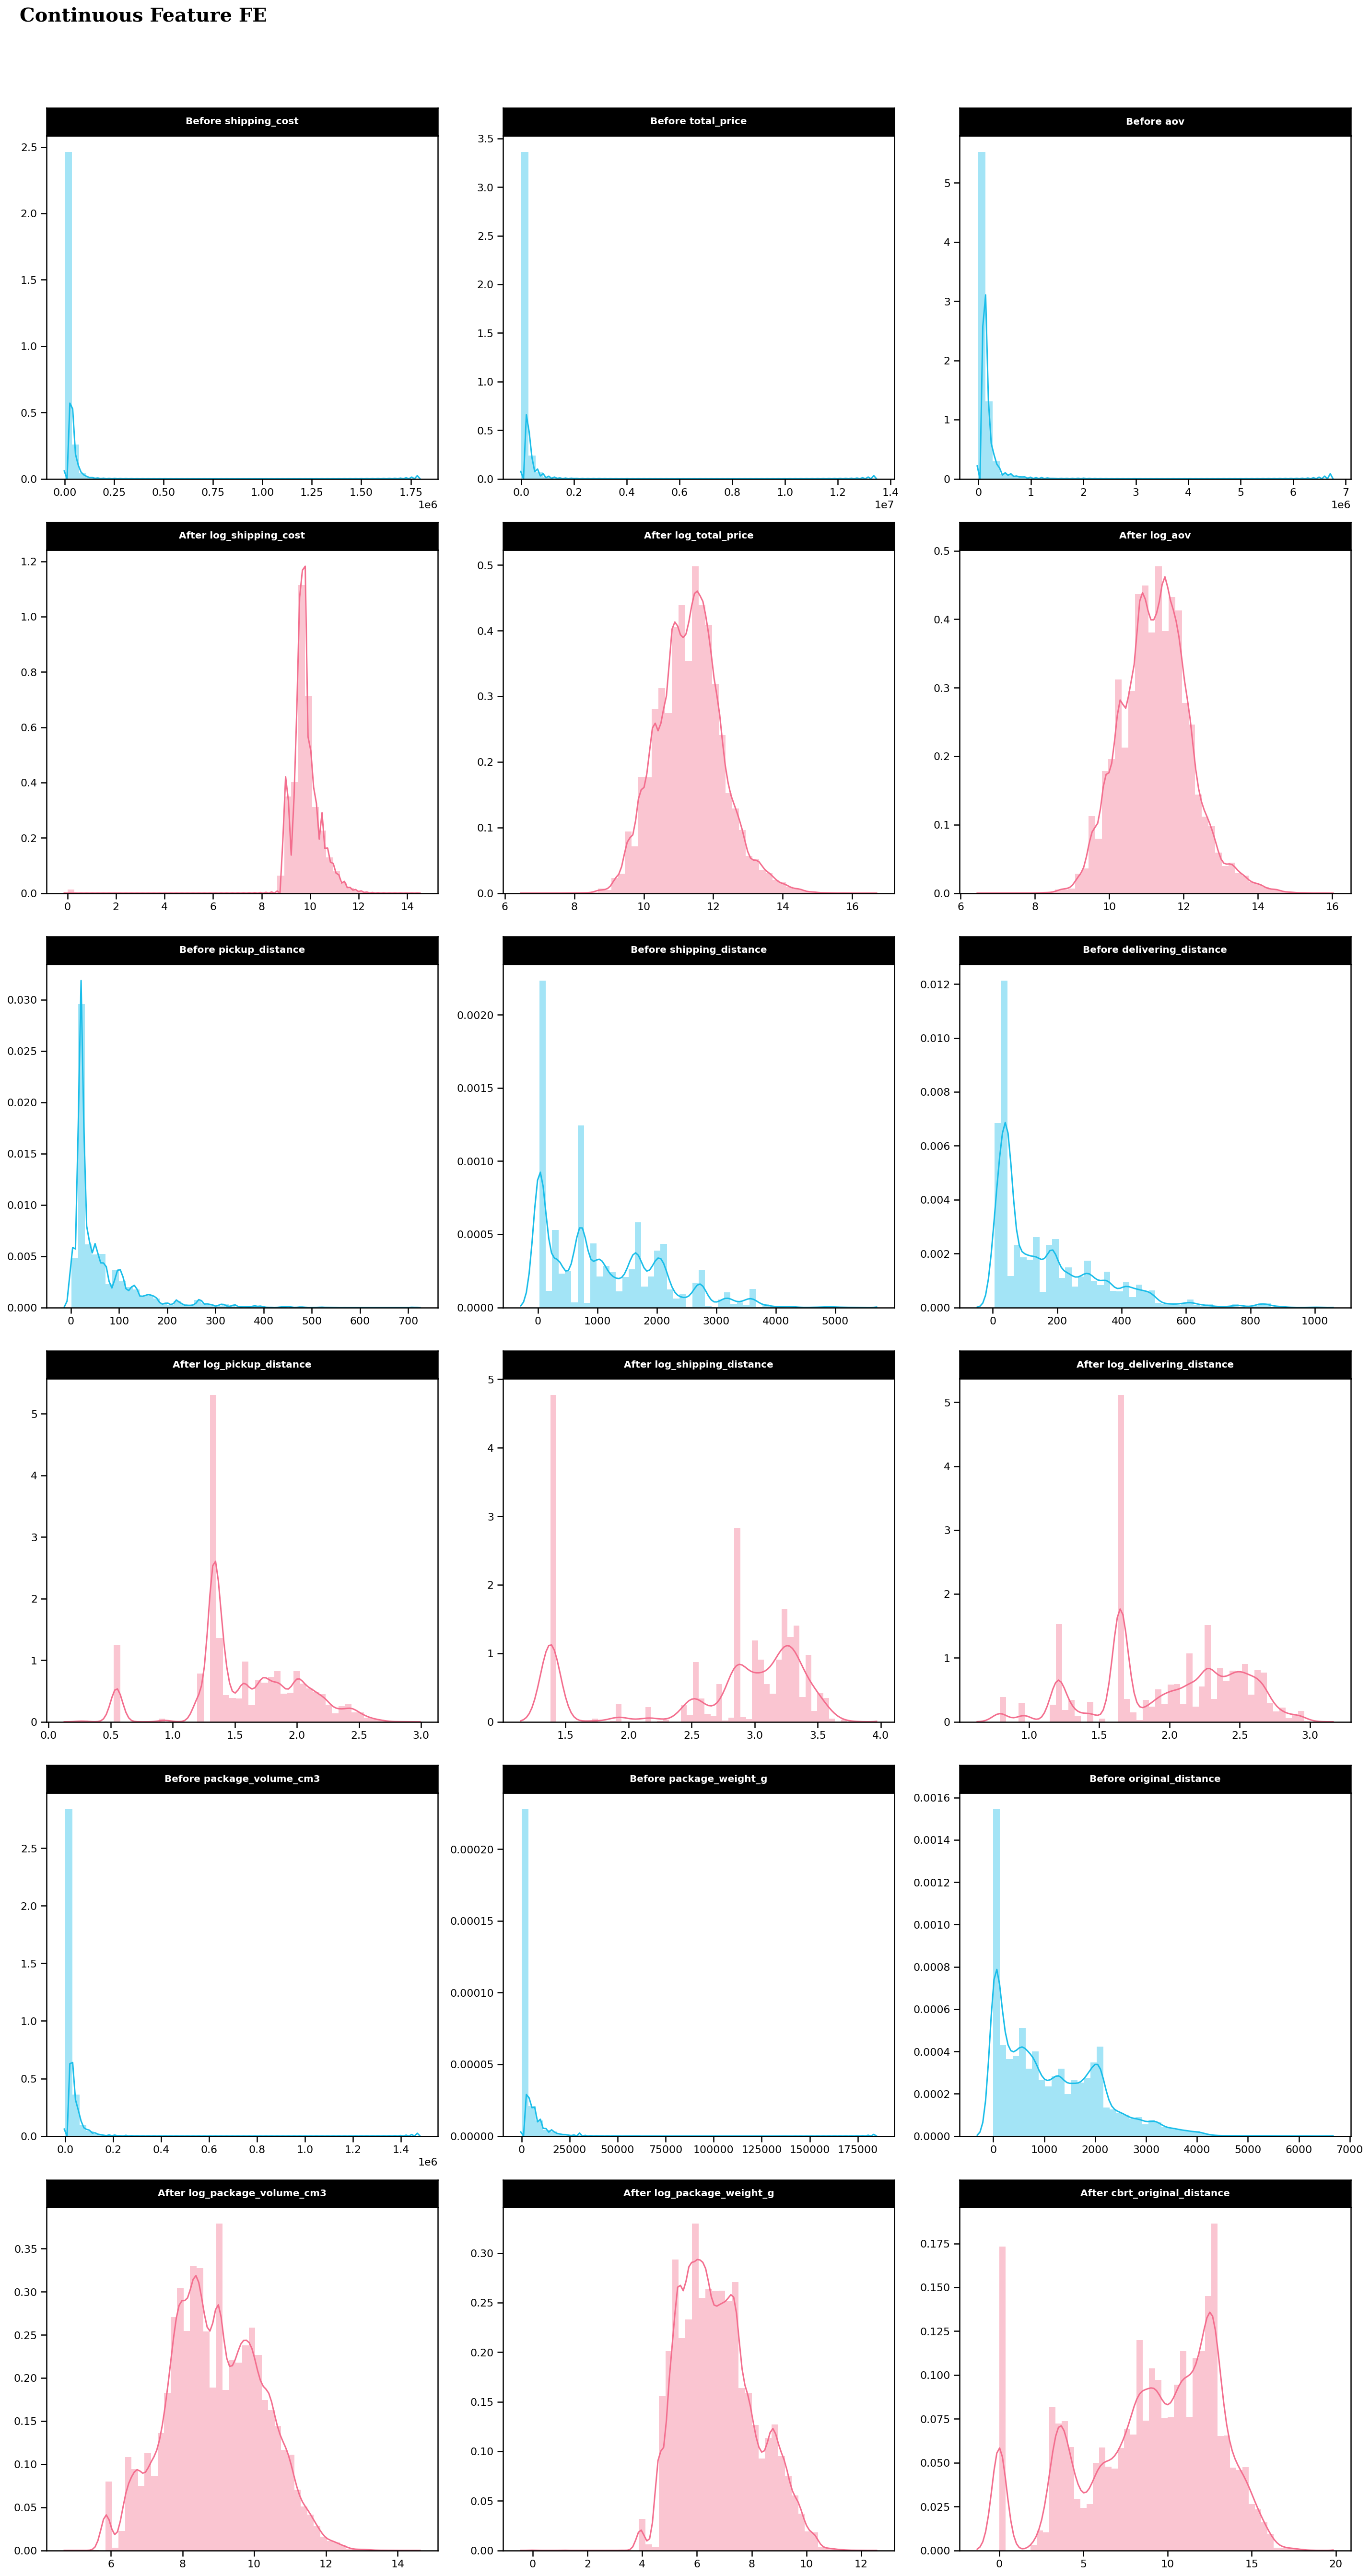

In [175]:
# === See Normalization Result ===
# === Numerical Feature Distribution ===
fig, ax = plt.subplots(6, 3, figsize=(20, 36))

for i, (key, value) in enumerate(transformed_map.items()): 
    ax1 = ax[(i//3) * 2][i%3]
    ax2 = ax[((i//3) * 2) + 1][i%3]
    sns.distplot(df[key], 
                color=color2,
                ax=ax1)
    sns.distplot(df[value],
                color=color1,
                ax=ax2)
    
    ax1.set_xlabel('',visible=False)
    ax2.set_xlabel('',visible=False)
    
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("top", size="8%", pad=0)
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_facecolor('black')
    
    divider2 = make_axes_locatable(ax2)
    cax2 = divider2.append_axes("top", size="8%", pad=0)
    cax2.get_xaxis().set_visible(False)
    cax2.get_yaxis().set_visible(False)
    cax2.set_facecolor('black')

    at = AnchoredText(f'Before {key}', loc=10, 
                      prop=dict(backgroundcolor='black',
                                size=10, color='white', weight='bold'))
    
    at2 = AnchoredText(f'After {value}', loc=10, 
                      prop=dict(backgroundcolor='black',
                                size=10, color='white', weight='bold'))
    
    
    cax.add_artist(at)
    cax2.add_artist(at2)
    
fig.text(0.018, 1.03, 'Continuous Feature FE', fontsize=20, fontweight='bold', fontfamily='serif')

plt.tight_layout()
plt.show()

In [176]:
# === Numerical Feature Basic Statistics === 
df[transformed_map.values()].describe().T.style \
                            .bar(subset=['mean'], color=color2)\
                            .bar(subset=['min', 'max'], color=color1)\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
log_shipping_cost,90183.000000,9.785997,0.800829,0.000000,9.517163,9.732165,10.057967,14.400494
log_total_price,90183.000000,11.330369,0.928455,6.745236,10.714418,11.349229,11.911702,16.413746
log_aov,90183.000000,11.256629,0.919170,6.745236,10.596635,11.275937,11.842229,15.722828
log_pickup_distance,90183.000000,1.589318,0.446786,0.267252,1.329263,1.546131,1.913345,2.851819
log_shipping_distance,90183.000000,2.667541,0.755858,1.380166,2.250698,2.915438,3.229831,3.730957
log_delivering_distance,90183.000000,1.994173,0.499847,0.793320,1.646768,2.048484,2.426419,3.001815
log_package_volume_cm3,90183.000000,8.903323,1.306175,5.123964,7.965546,8.859363,9.893437,14.204846
log_package_weight_g,90183.000000,6.753899,1.348576,0.000000,5.707110,6.566672,7.576097,12.124868
cbrt_original_distance,90183.000000,8.973361,4.029101,0.000000,6.311035,9.590149,12.254337,18.522653


,wd_actual_delivery_interval
wd_actual_delivery_interval,1.000000
log_shipping_cost,0.211363
cbrt_original_distance,0.203099
log_shipping_distance,0.174387
wd_pickup_limit_interval,0.126716
log_delivering_distance,0.126126
log_aov,0.094688
log_total_price,0.091602
log_package_weight_g,0.086532
product_weight_g_per_item,0.078520


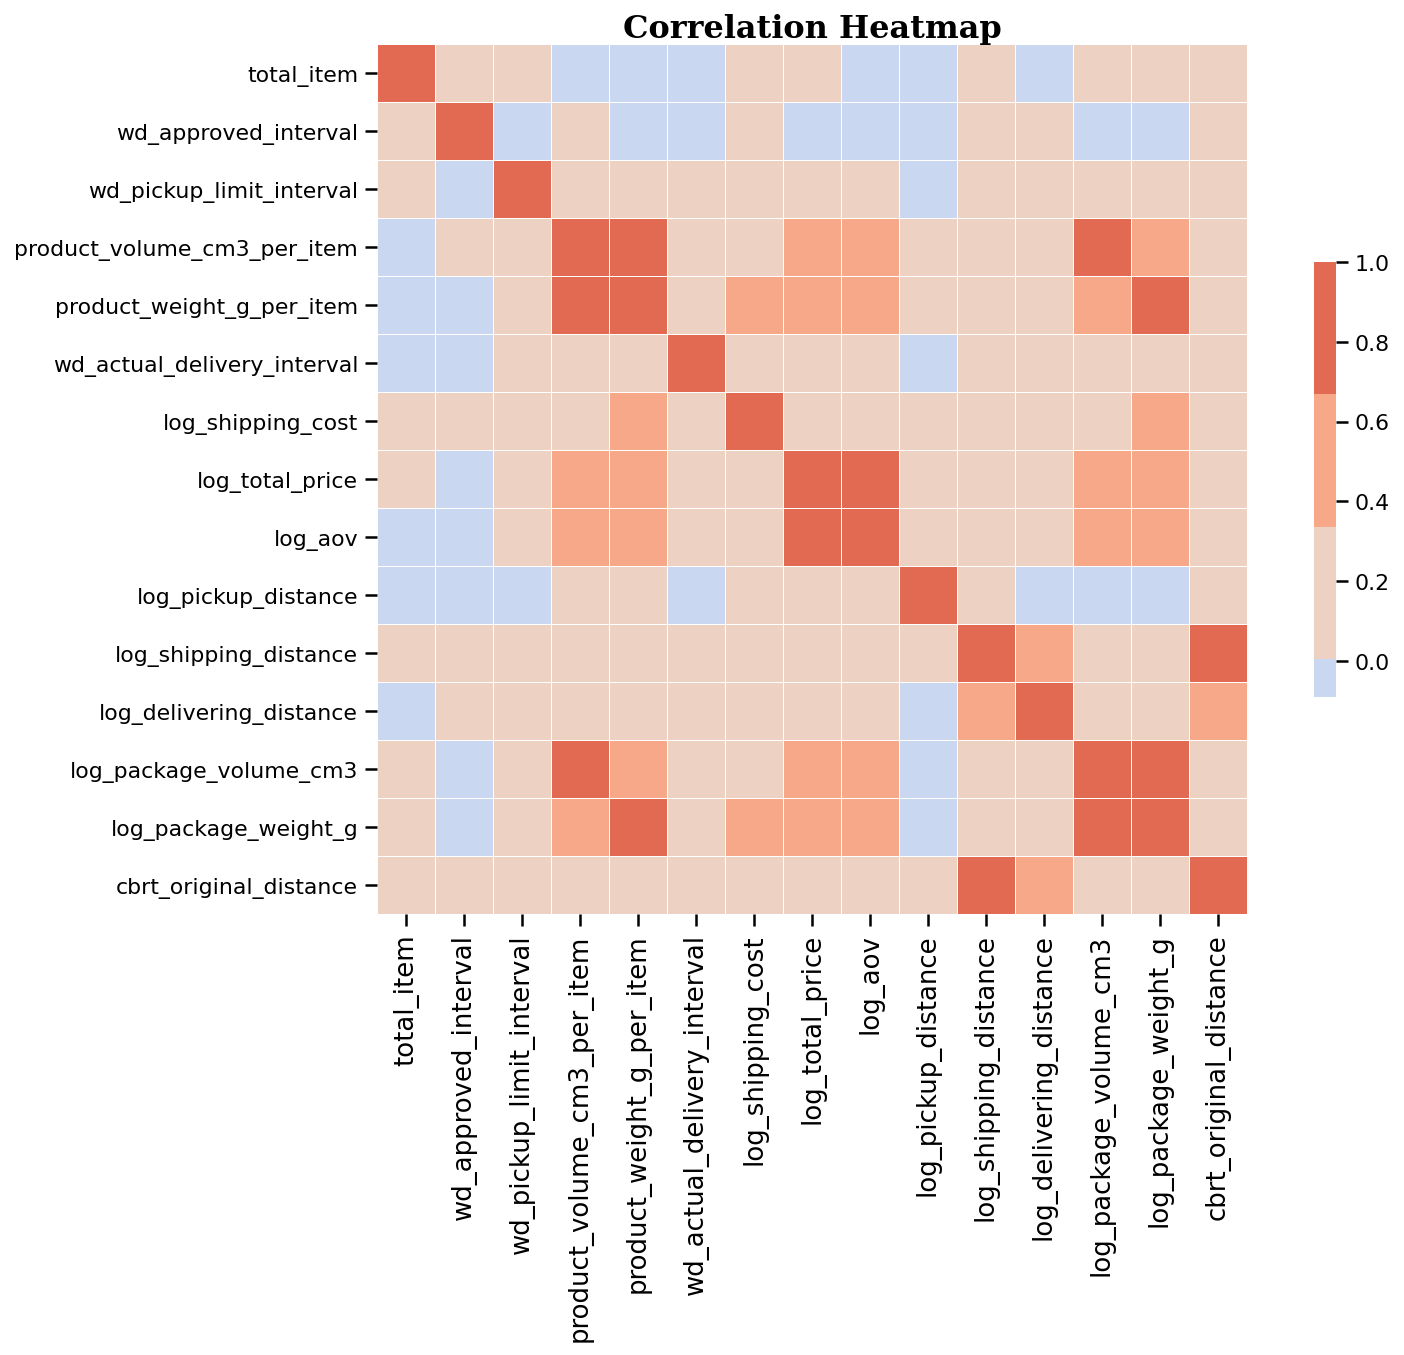

In [177]:
## Bivariative - Correlation Heatmap
new_cols = [col for col in numerical_feature if col not in transformed_map.keys()]
new_cols += transformed_map.values()

corr = df[new_cols].corr()
lowerlimit = 0 # limit the correlation
upperlimit = 1
m = ~(corr.mask(np.eye(len(corr), dtype=bool)).abs()[target] < lowerlimit) & ~(corr.mask(np.eye(len(corr), dtype=bool)).abs()[target] > upperlimit) &  ~(corr.mask(np.eye(len(corr), dtype=bool)).abs()[target].isna())
m[target] = True
limited = corr.loc[m]
corr_cols = [col for col in m.index if m[col]]
display(limited[target].to_frame().sort_values(by=target, ascending=False).style.background_gradient(cmap='coolwarm'))
mask = np.triu(np.ones_like(corr[corr_cols], dtype=bool))

plt.figure(figsize=(12,8))
sns.heatmap(df[corr_cols].corr(), linewidth=.5,cmap=sns.color_palette("coolwarm"), center=0,square=True, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap",fontsize=16, va= 'center', fontfamily='serif',fontweight='semibold')
plt.tick_params(axis='x', which='major', labelsize=13)
plt.show()

🔥 Thanks for seeing my EDA Notebook